**Multitarefas - Mineração de Dados**


**Nome: Davi Augusto Neves Leite**

**Data de Entrega: 07/12/2023**


---


# **Materiais**


Os principais recursos para a execução desta atividade podem ser vistos a seguir.

1. **Software**

- Sistemas Operacionais: Windows 11 para _desktop_;
- Ambiente de Desenvolvimento Integrado: Microsoft Visual Studio Code;
- Linguagem de Programação: Python 3.12.0 64-bit.

2. **Hardware**

- Notebook pessoal Lenovo Ideapad 330-15IKB com: processador Intel Core i7-8550U, HDD WD Blue WD10SPZX de 1TB, SSD Crucial BX500 de 1TB, 12 GB DDR4 de Memória RAM e placa de vídeo NVIDIA GeForce MX150 (2 GB GDDR5 de memória).


---


# **Instalação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a instalação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scikit-learn
%pip install scikit-multilearn
%pip install liac-arff

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---


# **Importação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a importação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [2]:
import numpy as np  # Manipulação de listas
import pandas as pd  # Manipulação de tabelas
import seaborn as sns  # Geração de gráficos estatísticos
import plotly.express as px  # Outro para geração de gráficos
import matplotlib.pyplot as plt  # Geração de gráficos de listas
import sklearn as skl  # Biblioteca para pré-processamento e outros
from copy import copy as cp  # Possibilitar copiar os objetos

# Importação do Scikit-Multilearn: biblioteca baseada no Scikit para tratar datasets multirrótulos
import skmultilearn as skml

# Ignorar os avisos não importantes durante a execução deste notebook
import warnings

warnings.filterwarnings("ignore")

---


# **Conjunto de Dados: _Birds_**


**Descrição do Dataset:** consiste em um conjunto de dados de áudios coletados na Floresta de Pesquisa Experimental de Longo Prazo H. J. Andrews, na Cordilheira Cascade de Oregon, entre os anos de 2009 e 2010. Esse áudios representam **19 espécies de pássaros** (classes/rótulos) no ambiente e o dataset possui, no total, **645 gravações de áudio** (total de dados) de 10 segundos, incluindo gravações com chuva, vento e ausência de pássaros. Cada gravação de áudio é associada a um conjunto de espécies presentes, **podendo ser uma ou mais espécies em um mesmo áudio**. Especificamente, o conjunto de dados a ser utilizado nesta atividade possui o total de **260 características (2 nominais e 258 numéricas)**, incluindo as **19 espécies de pássaros** comentadas anteriormente. Outros dados incluem: **cardinalidade (número médio de rótulos por dado)** de 1,014; **densidade (número médio de rótulos por rótulo)** de 0,053 e distinção de 133.

**Referência original deste conjunto de dados:** F. Briggs, Yonghong Huang, R. Raich, K. Eftaxias, Zhong Lei, W. Cukierski, S. Hadley, A. Hadley, M. Betts, X. Fern, J. Irvine, L. Neal, A. Thomas, G. Fodor, G. Tsoumakas, Hong Wei Ng, Thi Ngoc Tho Nguyen, H. Huttunen, P. Ruusuvuori, T. Manninen, A. Diment, T. Virtanen, J. Marzat, J. Defretin, D. Callender, C. Hurlburt, K. Larrey, M. Milakov. "The 9th annual MLSP competition: New methods for acoustic classification of multiple simultaneous bird species in a noisy environment", **in proc. 2013 IEEE International Workshop on Machine Learning for Signal Processing (MLSP)**. Disponível em: https://ieeexplore.ieee.org/document/6661934. Acesso em: 01 de dez. de 2023.

**Este conjunto de dados pode ser baixado por meio de:** [Birds - Mulan: A Java Library for Multi-Label Learning](https://mulan.sourceforge.net/datasets-mlc.html) ou [Birds - Multi-Label Classification Dataset Repository](https://www.uco.es/kdis/mllresources/)
(última data de acesso: 01 de dez. de 2023).


## **Importação da Base de Dados**


Para importar o conjunto de dados, utiliza-se diretamente a biblioteca _scikit-multilearn_, a qual já possui o carregamento deste _dataset_ em suas funções. Posteriormente, esta mesma biblioteca será responsável por aplicar as **técnicas de classificação multirrótulo**.


In [3]:
# Classe do skmultilearn para importar a base de dados
from skmultilearn.dataset import load_dataset

# Carrega os conjuntos de dados, já separados em subconjuntos de treinamento e teste (cross-validation)
## Também, já são carregados, separadamente, os nomes das características e dos rótulos do dataset
X_train, y_train, feature_names, label_names = load_dataset("birds", "train")
X_test, y_test, _, _ = load_dataset("birds", "test")

birds:train - exists, not redownloading
birds:test - exists, not redownloading


In [4]:
# Quantidade de dados de treinamento e características
print("Subconjunto de Treinamento")
print(f"Quantidade de Dados: {X_train.shape[0]}")
print(f"Quantidade de Características: {len(feature_names)}")
print(f"Quantidade de Rótulos: {len(label_names)}")
print()

# Quantidade de dados de teste e características
print("Subconjunto de Teste")
print(f"Quantidade de Dados: {X_test.shape[0]}")
print(f"Quantidade de Características: {len(feature_names)}")
print(f"Quantidade de Rótulos: {len(label_names)}")

Subconjunto de Treinamento
Quantidade de Dados: 322
Quantidade de Características: 260
Quantidade de Rótulos: 19

Subconjunto de Teste
Quantidade de Dados: 323
Quantidade de Características: 260
Quantidade de Rótulos: 19


## **Pré-Processamento dos Dados**


### Exibição de Dados do Conjunto

Abaixo, é possível visualizar alguns dados a respeito das **características** e dos **rótulos**.


In [5]:
# Exibindo as características do conjunto
print("Características do Conjunto")
feature_names

Características do Conjunto


[('audio-ssd1', 'NUMERIC'),
 ('audio-ssd2', 'NUMERIC'),
 ('audio-ssd3', 'NUMERIC'),
 ('audio-ssd4', 'NUMERIC'),
 ('audio-ssd5', 'NUMERIC'),
 ('audio-ssd6', 'NUMERIC'),
 ('audio-ssd7', 'NUMERIC'),
 ('audio-ssd8', 'NUMERIC'),
 ('audio-ssd9', 'NUMERIC'),
 ('audio-ssd10', 'NUMERIC'),
 ('audio-ssd11', 'NUMERIC'),
 ('audio-ssd12', 'NUMERIC'),
 ('audio-ssd13', 'NUMERIC'),
 ('audio-ssd14', 'NUMERIC'),
 ('audio-ssd15', 'NUMERIC'),
 ('audio-ssd16', 'NUMERIC'),
 ('audio-ssd17', 'NUMERIC'),
 ('audio-ssd18', 'NUMERIC'),
 ('audio-ssd19', 'NUMERIC'),
 ('audio-ssd20', 'NUMERIC'),
 ('audio-ssd21', 'NUMERIC'),
 ('audio-ssd22', 'NUMERIC'),
 ('audio-ssd25', 'NUMERIC'),
 ('audio-ssd26', 'NUMERIC'),
 ('audio-ssd27', 'NUMERIC'),
 ('audio-ssd28', 'NUMERIC'),
 ('audio-ssd29', 'NUMERIC'),
 ('audio-ssd30', 'NUMERIC'),
 ('audio-ssd31', 'NUMERIC'),
 ('audio-ssd32', 'NUMERIC'),
 ('audio-ssd33', 'NUMERIC'),
 ('audio-ssd34', 'NUMERIC'),
 ('audio-ssd35', 'NUMERIC'),
 ('audio-ssd36', 'NUMERIC'),
 ('audio-ssd37', 'NUMER

In [6]:
# Exibindo os todos os rótulos do conjunto
print("Rótulos do Conjunto")
label_names

Rótulos do Conjunto


[('Brown Creeper', ['0', '1']),
 ('Pacific Wren', ['0', '1']),
 ('Pacific-slope Flycatcher', ['0', '1']),
 ('Red-breasted Nuthatch', ['0', '1']),
 ('Dark-eyed Junco', ['0', '1']),
 ('Olive-sided Flycatcher', ['0', '1']),
 ('Hermit Thrush', ['0', '1']),
 ('Chestnut-backed Chickadee', ['0', '1']),
 ('Varied Thrush', ['0', '1']),
 ('Hermit Warbler', ['0', '1']),
 ("Swainson\\'s Thrush", ['0', '1']),
 ("Hammond\\'s Flycatcher", ['0', '1']),
 ('Western Tanager', ['0', '1']),
 ('Black-headed Grosbeak', ['0', '1']),
 ('Golden Crowned Kinglet', ['0', '1']),
 ('Warbling Vireo', ['0', '1']),
 ("MacGillivray\\'s Warbler", ['0', '1']),
 ("Stellar\\'s Jay", ['0', '1']),
 ('Common Nighthawk', ['0', '1'])]

A seguir, é possível visualizar a **quantidade de dados por rótulo**, tanto para o **subconjunto de treinamento** quanto para o **subconjunto de teste**.


Quantidade de Dados por Rótulo

Brown Creeper: 14
Pacific Wren: 81
Pacific-slope Flycatcher: 46
Red-breasted Nuthatch: 9
Dark-eyed Junco: 20
Olive-sided Flycatcher: 14
Hermit Thrush: 47
Chestnut-backed Chickadee: 40
Varied Thrush: 61
Hermit Warbler: 53
Swainson\'s Thrush: 103
Hammond\'s Flycatcher: 28
Western Tanager: 33
Black-headed Grosbeak: 9
Golden Crowned Kinglet: 37
Warbling Vireo: 17
MacGillivray\'s Warbler: 6
Stellar\'s Jay: 10
Common Nighthawk: 26


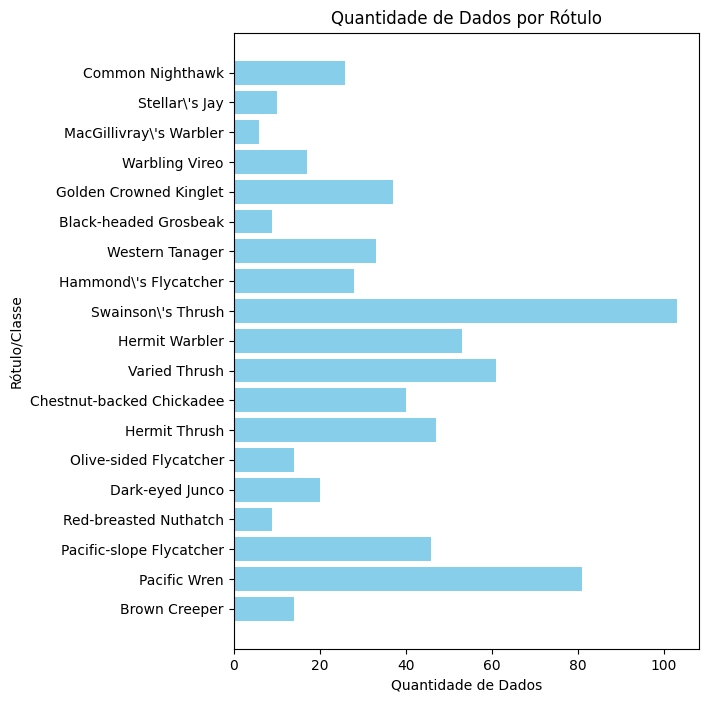

In [7]:
# Separando a quantidade de dados por rótulo
class_counts = np.sum(y_train.A, axis=0, dtype=np.int64) + np.sum(
    y_test.A, axis=0, dtype=np.int64
)
class_labels = np.array([label_names[i][0] for i in range(len(label_names))])

# Mostrando a quantidade da dados por classe
print("Quantidade de Dados por Rótulo\n")
for i in range(class_labels.shape[0]):
    print(f"{class_labels[i]}: {class_counts[i]}")

# Plotando a quantidade de dados por rótulo
plt.figure(figsize=(6, 8))
plt.ylabel("Rótulo/Classe", loc="center")
plt.xlabel("Quantidade de Dados", loc="center")
plt.title("Quantidade de Dados por Rótulo", loc="center")
plt.barh(class_labels, class_counts, color="skyblue")
plt.show()

Quantidade de Dados por Rótulo: Treinamento

Brown Creeper: 7
Pacific Wren: 35
Pacific-slope Flycatcher: 21
Red-breasted Nuthatch: 4
Dark-eyed Junco: 13
Olive-sided Flycatcher: 8
Hermit Thrush: 25
Chestnut-backed Chickadee: 22
Varied Thrush: 29
Hermit Warbler: 25
Swainson\'s Thrush: 64
Hammond\'s Flycatcher: 12
Western Tanager: 18
Black-headed Grosbeak: 6
Golden Crowned Kinglet: 18
Warbling Vireo: 8
MacGillivray\'s Warbler: 4
Stellar\'s Jay: 6
Common Nighthawk: 16

Quantidade de Dados por Rótulo: Teste

Brown Creeper: 7
Pacific Wren: 46
Pacific-slope Flycatcher: 25
Red-breasted Nuthatch: 5
Dark-eyed Junco: 7
Olive-sided Flycatcher: 6
Hermit Thrush: 22
Chestnut-backed Chickadee: 18
Varied Thrush: 32
Hermit Warbler: 28
Swainson\'s Thrush: 39
Hammond\'s Flycatcher: 16
Western Tanager: 15
Black-headed Grosbeak: 3
Golden Crowned Kinglet: 19
Warbling Vireo: 9
MacGillivray\'s Warbler: 2
Stellar\'s Jay: 4
Common Nighthawk: 10


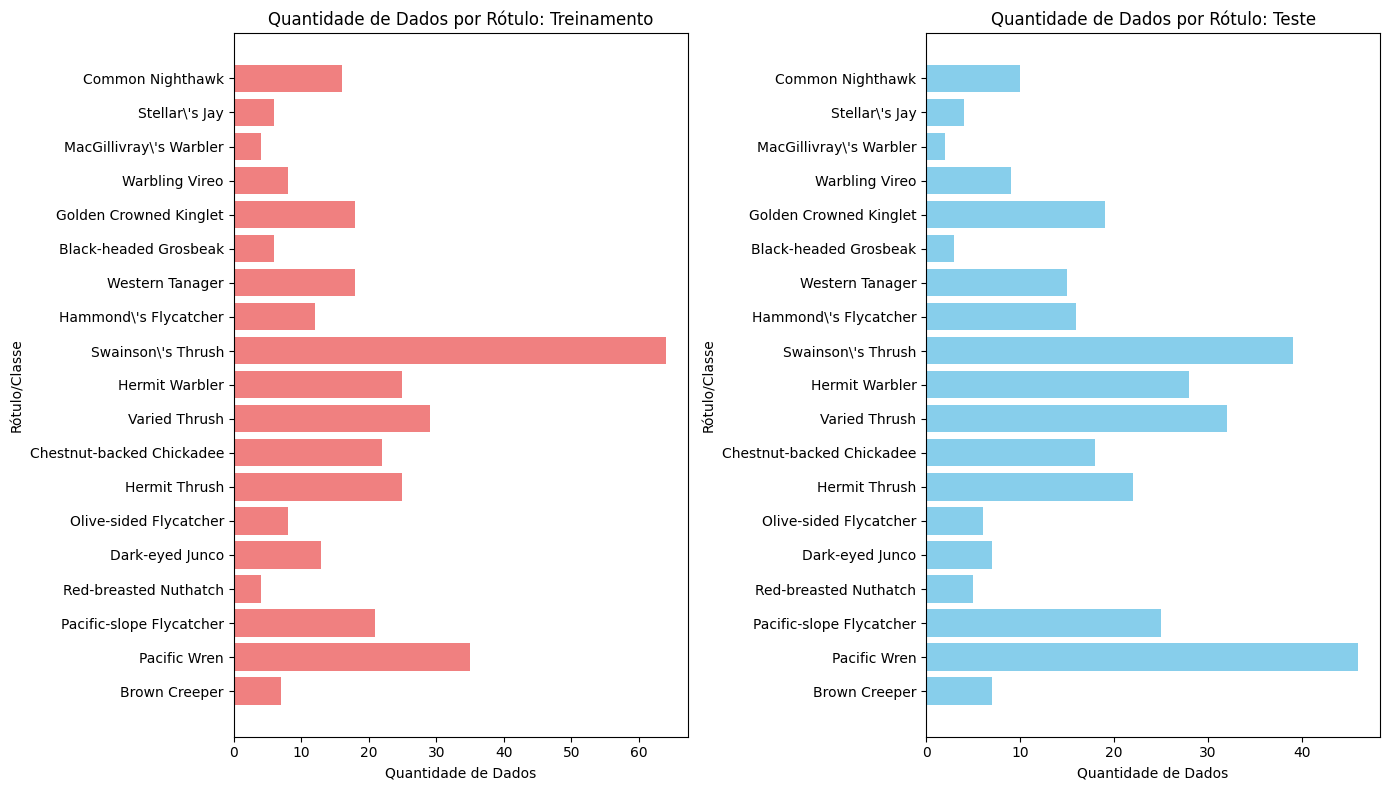

In [8]:
# Separando a quantidade de dados por rótulo
class_counts_train = np.sum(y_train.A, axis=0, dtype=np.int64)
class_counts_test = np.sum(y_test.A, axis=0, dtype=np.int64)

# Mostrando a quantidade da dados por classe
print("Quantidade de Dados por Rótulo: Treinamento\n")
for i in range(class_labels.shape[0]):
    print(f"{class_labels[i]}: {class_counts_train[i]}")
print()
print("Quantidade de Dados por Rótulo: Teste\n")
for i in range(class_labels.shape[0]):
    print(f"{class_labels[i]}: {class_counts_test[i]}")

# Plotando a quantidade de dados por rótulo em subfiguras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Subfigura 1: Contagens de classe de treinamento
ax1.barh(class_labels, class_counts_train, color="lightcoral")
ax1.set_title("Quantidade de Dados por Rótulo: Treinamento")
ax1.set_xlabel("Quantidade de Dados")
ax1.set_ylabel("Rótulo/Classe")

# Subfigura 2: Contagens de classe de teste
ax2.barh(class_labels, class_counts_test, color="skyblue")
ax2.set_title("Quantidade de Dados por Rótulo: Teste")
ax2.set_xlabel("Quantidade de Dados")
ax2.set_ylabel("Rótulo/Classe")

plt.tight_layout()
plt.show()

### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [9]:
# Verifica se há dados faltantes no conjunto de treinamento
X_train_np = X_train.A  # Convertendo para NumPy, a partir do SciPy.sparse
y_train_np = y_train.A
missing_values_train = np.isnan(X_train_np).sum() + np.isnan(y_train_np).sum()

# Verifica se há dados faltantes no conjunto de teste
X_test_np = X_test.A
y_test_np = y_test.A
missing_values_test = np.isnan(X_test_np).sum() + np.isnan(y_test_np).sum()

print("Número de Dados Perdidos - Treinamento: {0}".format(missing_values_train))
print("Número de Dados Perdidos - Teste: {0}".format(missing_values_test))

Número de Dados Perdidos - Treinamento: 0
Número de Dados Perdidos - Teste: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


---


## **Tema: Classificação Multirrótulo**


Nos chamados problemas de **classificação multirrótulo**, uma instância de dados pode ser associada a múltiplas classes simultaneamente, ao contrário da classificação padrão, em que cada instância é atribuída a apenas uma classe. Nestes tipos de problemas,são apresentados desafios adicionais devido à complexidade à previsão de múltiplas classes para uma única instância, como no **tamanho total**, **desbalancemanto** e, principalmente, na **correlação entre rótulos** do problema a ser tratado.

Existem dois tipos de abordagens para esta classificação: as **independentes de algoritmos**, em que são aplicados os algoritmos tradicionais de classificação de tal forma em que **o problema seja transformado em vários problemas de monorrótulo**; e as **dependentes de algoritmos**, em que são criados **algoritmos específicos para tratar o problema multirrótulo**, como o Multi-SVM.

Neste contexto, levando em conta a flexibilidade relacionada à abstração do algoritmo de classificação base, serão aplicadas e comparadas algumas técnicas **independentes de algoritmos**, sendo elas: _Binary Relevance_ e a _Label Powerset_. Em termos de avaliação, para ambas técnicas serão calculadas a **Hamming Loss** e a **Acurácia**, duas das métricas recomendadas para classificação multirrótulo. Especialmente, a **Hamming Loss** mede o **grau de acerto com que cada classificador prevê cada um dos rótulos com relação ao total de rótulos**, sendo calculado por meio da média da diferença entre os rótulos previstos e os rótulos verdadeiros para cada um dos classificadores.

Para tanto, é levado em conta o **_cross-validation_** dado pelo conjunto original baixado, em que os dados são separados previamente em **49,92% para o subconjunto de treinamento** e **50,08% para o subconjunto de teste**.


### **Técnica 1:** **_Binary Relevance (BR)_**


A _Binary Relevance (BR)_, também denominada de método _One vs All_, consiste em uma técnica que **decompõe a tarefa de classificação multirrótulo em várias tarefas de classificação clássica**, ou seja, utiliza _k_ classificadores tendo cada qual associado a uma classe do problema e treinado para classificá-lo contra todos os outros. Suas vantagens incluem: método simples e intuitivo, complexidade linear em _k_ e capacidade de prever conjunto de rótulos que não estão presentes na base de dados original. Já sua principal desvantagem está relacionada na ignorância com as possíveis correlações entre os rótulos das classes, tendo em vista que os **classificadores nesta técnica tomam decisões independentes entre si**.

Para efeitos práticos, a seguir é utilizado a **BR com o classificador SVM (_Support Vector Machine_)**, por meio da biblioteca _scikit-multilearn_.


In [10]:
# Importando as classes necessárias do BR
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC  # Classificador SVM

# Inicializando o BR com o classificador SVM
br_classifier = BinaryRelevance(
    classifier=SVC(
        random_state=42
    ),  # Parâmetros padrões do sklearn, exceto random_state
    require_dense=[False, True],  # Tipo de resultados por rótulo
)

# Realizando o treinamento
br_classifier.fit(X_train, y_train)

# Visualizando todos os classificadores treinados na abordagem BR
print(f"Quantidade de Rótulos do Conjunto: {len(label_names)}")
print(f"Quantidade de Classificadores Treinados: {len(br_classifier.classifiers_)}\n")
print("Lista de Classificadores:")
print(br_classifier.classifiers_)

Quantidade de Rótulos do Conjunto: 19
Quantidade de Classificadores Treinados: 19

Lista de Classificadores:
[SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42)]


In [11]:
# Importando as métricas para análise da técnica -> Hamming Loss e Acurácia
from sklearn.metrics import hamming_loss, accuracy_score

# Realizando a predição no conjunto de teste
y_pred = br_classifier.predict(X_test)

# Aplicando e mostrando métricas
print("Métricas com Binary Relevance\n")
print(f"Hamming Loss: {hamming_loss(y_pred, y_test)}")
print(f"Acurácia: {accuracy_score(y_pred, y_test)*100:.2f}%")

Métricas com Binary Relevance

Hamming Loss: 0.05328336320677855
Acurácia: 47.06%


### **Técnica 2:** **_Label Powerset (LP)_**


A _Label Powerset (LP)_ é uma técnica que considera **cada combinação única de rótulos como uma classe distinta**. Em outras palavras, cada instãncia é atribuída a um conjunto único de rótulos, com o intuito de realizar **uma correlação entre os dados e os rótulos**. Com a criação desses novos conjuntos de classes, as classes do problema original não são perdidas, ainda que o número de classes envolvidas no problema pode aumentar consideravelmente, sendo seu principal ponto negativo.

Para efeitos práticos, a seguir é utilizado a **LP com o classificador SVM (_Support Vector Machine_)**, por meio da biblioteca _scikit-multilearn_.


In [12]:
# Importando as classes necessárias do LP
from skmultilearn.problem_transform import LabelPowerset
from sklearn.svm import SVC  # Classificador SVM

# Inicializando o LP com o classificador SVM
lp_classifier = LabelPowerset(
    classifier=SVC(
        random_state=42
    ),  # Parâmetros padrões do sklearn, exceto random_state
    require_dense=[False, True],  # Tipo de resultados por rótulo
)

# Realizando o treinamento
lp_classifier.fit(X_train, y_train)

# Visualizando todos os classificadores treinados na abordagem LP
print(f"Quantidade de Rótulos do Conjunto: {len(label_names)}")
print(
    f"Quantidade de Rótulos Únicos Criados Treinados: {len(lp_classifier.unique_combinations_)}\n"
)
print("Lista de Rótulos Combinados Unicamente:")
print(lp_classifier.unique_combinations_)

Quantidade de Rótulos do Conjunto: 19
Quantidade de Rótulos Únicos Criados Treinados: 89

Lista de Rótulos Combinados Unicamente:
{'11,12': 0, '': 1, '10': 2, '15,17': 3, '1': 4, '2': 5, '7,10': 6, '10,18': 7, '1,17': 8, '4,6,10': 9, '7': 10, '0': 11, '8': 12, '9': 13, '1,7,12': 14, '0,2': 15, '7,15': 16, '6,12': 17, '6': 18, '13,14': 19, '9,10': 20, '1,2,8': 21, '2,10': 22, '8,11': 23, '5,6,10': 24, '8,10,14': 25, '2,5,9': 26, '4,8,10': 27, '1,10,11': 28, '1,10,12': 29, '18': 30, '2,4,10': 31, '17': 32, '1,7,10': 33, '1,10': 34, '7,18': 35, '10,12,18': 36, '2,4,6,7,9,10': 37, '16': 38, '9,12,18': 39, '6,10': 40, '1,12': 41, '1,2,5,9': 42, '1,8,10': 43, '0,5': 44, '4,8,12': 45, '9,10,16': 46, '8,9': 47, '8,10': 48, '5,12': 49, '2,7,8': 50, '1,11': 51, '11': 52, '1,2,11': 53, '10,15': 54, '4,7': 55, '4,6,7,9,10': 56, '9,10,18': 57, '6,7,10': 58, '14': 59, '1,2,7,12': 60, '1,14': 61, '1,6,14': 62, '13': 63, '15': 64, '6,9': 65, '2,3,7': 66, '2,3': 67, '2,8,10,14': 68, '12': 69, '10,12,14

In [13]:
# Importando as métricas para análise da técnica -> Hamming Loss e Acurácia
from sklearn.metrics import hamming_loss, accuracy_score

# Realizando a predição no conjunto de teste
y_pred = lp_classifier.predict(X_test)

# Aplicando e mostrando métricas
print("Métricas com Label Powerset\n")
print(f"Hamming Loss: {hamming_loss(y_pred, y_test)}")
print(f"Acurácia: {accuracy_score(y_pred, y_test)*100:.2f}%")

Métricas com Label Powerset

Hamming Loss: 0.05605344630927163
Acurácia: 47.68%


Desta forma, é possível inferir que, para o contexto descrito, cada técnica aplicada obteve melhores resultados do que a outra. No caso, o **_Hamming Loss_** para o **_Binary Relevance_** foi melhor do que o obtido pelo **_Label Powerset_**, ainda que a **Acurácia** obtida pelo **_Label Powerset_** tenha sido superior a obtida pelo **_Binary Relevance_**.


---
